In [25]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from configs.RecursiveVPSDE.Markovian_fQuadSinHF.recursive_Markovian_PostMeanScore_fQuadSinHF2_LowFTh_T256_H05_tl_110data_StbleTgt_HIGHNOISE import get_config
from configs.RecursiveVPSDE.Markovian_fSinLog.recursive_Markovian_PostMeanScore_fSinLog_LowFTh_T256_H05_tl_110data_StbleTgt_HIGHNOISE import get_config
from configs.RecursiveVPSDE.Markovian_fBiPot.recursive_Markovian_PostMeanScore_fBiPot_LowFTh_T256_H05_tl_110data_StbleTgt_HIGHNOISE import get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip(line, cell):
    return

In [27]:
config = get_config()
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"
hermite_dir = root_dir + "ExperimentResults/Ridge/"
if "SinLog" in config.data_path:
    diradd = "SinLog"
elif "QuadSin" in config.data_path:
    diradd = "QuadSinHF"
elif "BiPot" in config.data_path:
    diradd = "BiPot"
if config.diffusion == 0.1:
        diradd+= "LowNoise"
elif config.diffusion == 10.:
    diradd += "HighNoise"
hermite_dir += diradd+"/"
print(hermite_dir)

/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Ridge/BiPotHighNoise/


In [28]:
for f in os.listdir(hermite_dir):
    assert "1024NPath" not in f
    print(f)
    if "Diff100_MSEs" in f:
        print(hermite_dir+f)
        mse = pd.read_parquet(hermite_dir+f, engine="fastparquet")

Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_6_drift_est.npy
Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_2_drift_est.npy
Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_2_true_paths.npy
Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_4_true_drift.npy
Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_2_true_drift.npy
Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_4_true_paths.npy
Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_1_drift_est.npy
Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_8_true_drift.npy
Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_6_true_paths.npy
Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_13_drift_est.npy
Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_1_true_paths.npy
Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_6_true_drift.npy
Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_Diff100_8_true_paths.npy
Ridge_fBiPot_DriftEvalExp_10240NPaths_390

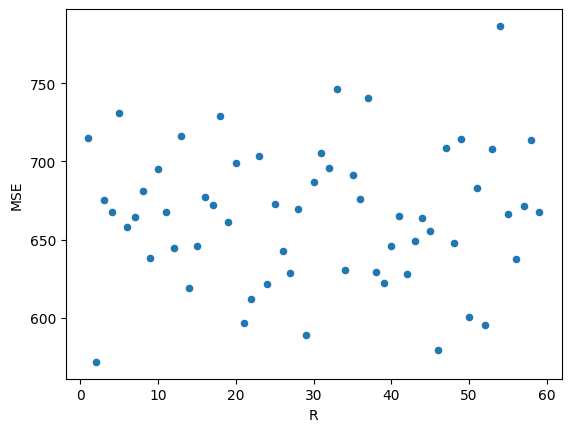

In [29]:
mse.reset_index(drop=False).plot(kind="scatter", x="index", y="0")
plt.xlabel("R")
plt.ylabel("MSE")
plt.show()
plt.close()

In [30]:
print(mse)
R = mse.dropna().iloc[np.argmin(mse.dropna().values.flatten())]
print("\n")
print(R)

                0
index            
1      714.848519
2      571.726136
3      675.147218
4      667.841952
5      730.870909
6      658.220631
7      664.728776
8      681.091734
9      638.304552
10     695.049138
11     667.578204
12     644.652000
13     716.411943
14     618.845122
15     645.579671
16     677.335199
17     671.964749
18     729.020008
19     661.420591
20     698.964781
21     596.666360
22     611.848269
23     703.273984
24     621.272202
25     672.527032
26     642.416393
27     628.650212
28     669.732065
29     589.098886
30     686.836805
31     705.297452
32     695.958082
33     746.466310
34     630.215351
35     691.330824
36     676.030601
37     740.595919
38     629.206840
39     621.976077
40     645.945634
41     664.873798
42     627.757517
43     648.998351
44     664.038464
45     655.700837
46     579.257208
47     708.404183
48     647.622317
49     714.450155
50     600.149223
51     682.862883
52     595.079393
53     707.774288
54     786

In [31]:
try:
    R = R.name
except AttributeError:
    pass
num_paths = 10240
save_path = hermite_dir + f"Ridge_f{diradd.replace('HighNoise', '')}_DriftEvalExp_{num_paths}NPaths_{config.deltaT:.3e}dT_Diff{config.diffusion:.1f}".replace(".", "")
print(save_path)
all_hermite_drifts = np.load(save_path + f"_{R}_drift_est.npy")
all_true_drifts=np.load(save_path + f"_{R}_true_drift.npy", allow_pickle=True)
all_true_paths = np.load(save_path + f"_{R}_true_paths.npy", allow_pickle=True)

/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Ridge/BiPotHighNoise/Ridge_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_Diff100


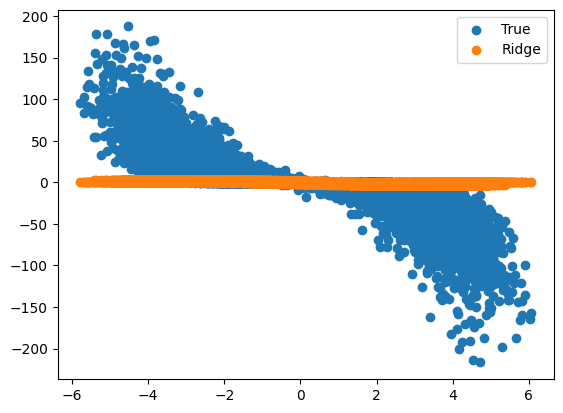

In [32]:
plt.scatter(all_true_paths.flatten(), all_true_drifts.flatten(), label="True")
plt.scatter(all_true_paths.flatten(), all_hermite_drifts.flatten(), label="Ridge")
plt.legend()
plt.show()